In [1]:
import pandas as pd
import numpy as np

import os
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap

import json
from datetime import datetime

import warnings
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
patient = pd.read_csv("PatientInfo.csv")
route = pd.read_csv("PatientRoute.csv")
region = pd.read_csv("Region.csv")

In [3]:
print("Patient")
display(patient.head())
print("Route")
display(route.head())
print("Region")
display(region.head())

Patient


patient_id  global_num     sex birth_year  age country province  \
0  1000000001         2.0    male       1964  50s   Korea    Seoul   
1  1000000002         5.0    male       1987  30s   Korea    Seoul   
2  1000000003         6.0    male       1964  50s   Korea    Seoul   
3  1000000004         7.0    male       1991  20s   Korea    Seoul   
4  1000000005         9.0  female       1992  20s   Korea    Seoul   

          city disease        infection_case  infection_order infected_by  \
0   Gangseo-gu     NaN       overseas inflow              1.0         NaN   
1  Jungnang-gu     NaN       overseas inflow              1.0         NaN   
2    Jongno-gu     NaN  contact with patient              2.0  2002000001   
3      Mapo-gu     NaN       overseas inflow              1.0         NaN   
4  Seongbuk-gu     NaN  contact with patient              2.0  1000000002   

  contact_number symptom_onset_date confirmed_date released_date  \
0             75         2020-01-22     2020-01-23    2020-02-05   
1             31                NaN     2020-01-30    2020-03-02   
2             17                NaN     2020-01-30    2020-02-19   
3              9         2020-01-26     2020-01-30    2020-02-15   
4              2                NaN     2020-01-31    2020-02-24   

  deceased_date     state  
0           NaN  released  
1           NaN  released  
2           NaN  released  
3           NaN  released  
4           NaN  released

Route


patient_id  global_num        date     province          city  \
0  1000000001         2.0  2020-01-22  Gyeonggi-do      Gimpo-si   
1  1000000001         2.0  2020-01-24        Seoul       Jung-gu   
2  1000000002         5.0  2020-01-25        Seoul   Seongbuk-gu   
3  1000000002         5.0  2020-01-26        Seoul   Seongbuk-gu   
4  1000000002         5.0  2020-01-26        Seoul  Seongdong-gu   

                    type   latitude   longitude  
0                airport  37.615246  126.715632  
1               hospital  37.567241  127.005659  
2                    etc  37.592560  127.017048  
3                  store  37.591810  127.016822  
4  public_transportation  37.563992  127.029534

Region


code province         city   latitude   longitude  \
0  10000    Seoul        Seoul  37.566953  126.977977   
1  10010    Seoul   Gangnam-gu  37.518421  127.047222   
2  10020    Seoul  Gangdong-gu  37.530492  127.123837   
3  10030    Seoul   Gangbuk-gu  37.639938  127.025508   
4  10040    Seoul   Gangseo-gu  37.551166  126.849506   

   elementary_school_count  kindergarten_count  university_count  \
0                      607                 830                48   
1                       33                  38                 0   
2                       27                  32                 0   
3                       14                  21                 0   
4                       36                  56                 1   

   academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0           1.44                     15.38                  5.8   
1           4.18                     13.17                  4.3   
2           1.54                     14.55                  5.4   
3           0.67                     19.49                  8.5   
4           1.17                     14.39                  5.7   

   nursing_home_count  
0               22739  
1                3088  
2                1023  
3                 628  
4                1080

## EDA

In [4]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
patient_id            4004 non-null int64
global_num            2806 non-null float64
sex                   3674 non-null object
birth_year            3267 non-null object
age                   3525 non-null object
country               4004 non-null object
province              4004 non-null object
city                  3926 non-null object
disease               18 non-null object
infection_case        3211 non-null object
infection_order       31 non-null float64
infected_by           899 non-null object
contact_number        680 non-null object
symptom_onset_date    535 non-null object
confirmed_date        4001 non-null object
released_date         1508 non-null object
deceased_date         65 non-null object
state                 4004 non-null object
dtypes: float64(2), int64(1), object(15)
memory usage: 563.2+ KB


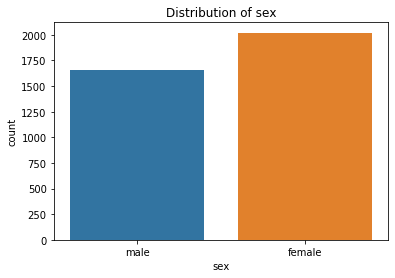

In [5]:
sns.countplot(patient['sex'])
plt.title('Distribution of sex')
plt.show()

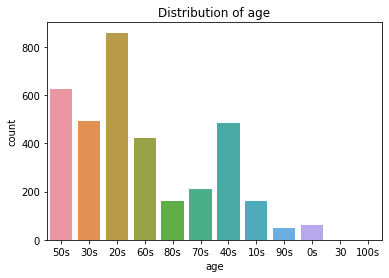

In [6]:
sns.countplot(patient['age'])
plt.title('Distribution of age')
plt.show()

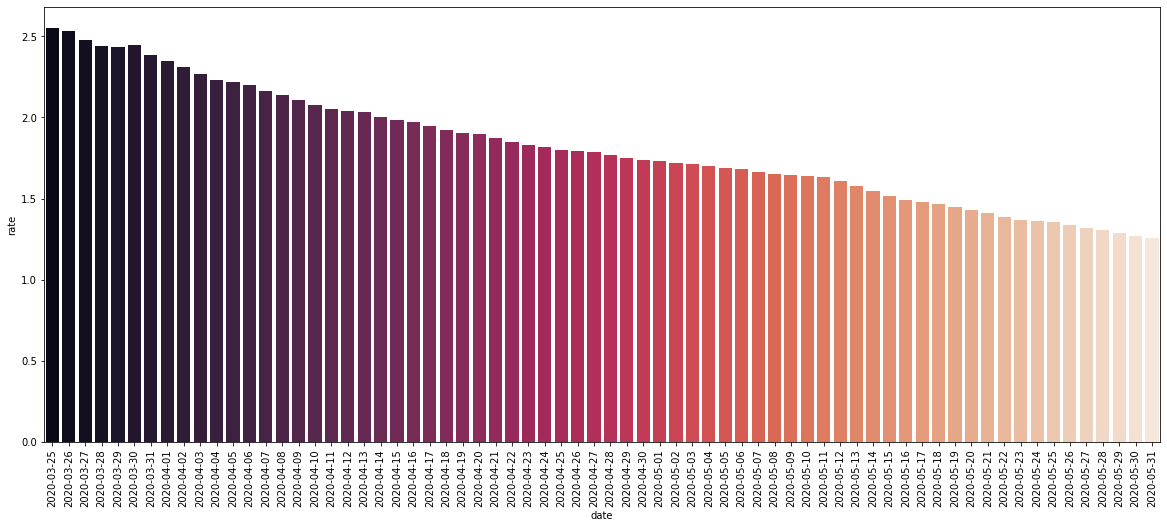

In [7]:
df_time = pd.read_csv("Time.csv")
df_period = df_time[df_time["date"] >= '2020-03-25'].copy()
df_period["rate"] = df_period["confirmed"] / df_period['test'] * 100

plt.figure(figsize=(20,8))
sns.barplot(x=df_period['date'], y=df_period['rate'], palette='rocket')
plt.xticks(rotation = 90)
plt.show()

In [8]:
# create a new data frame 
df_non_acc = df_time.copy()

r, d = df_time.shape
for i in range(1, r) :
    for j in range(2, d) :
        df_non_acc.iloc[i,j] = df_non_acc.iloc[i,j] - df_time.iloc[(i-1), j]

df_non_acc.to_csv("Time_daily.csv", sep=',', encoding='utf-8')

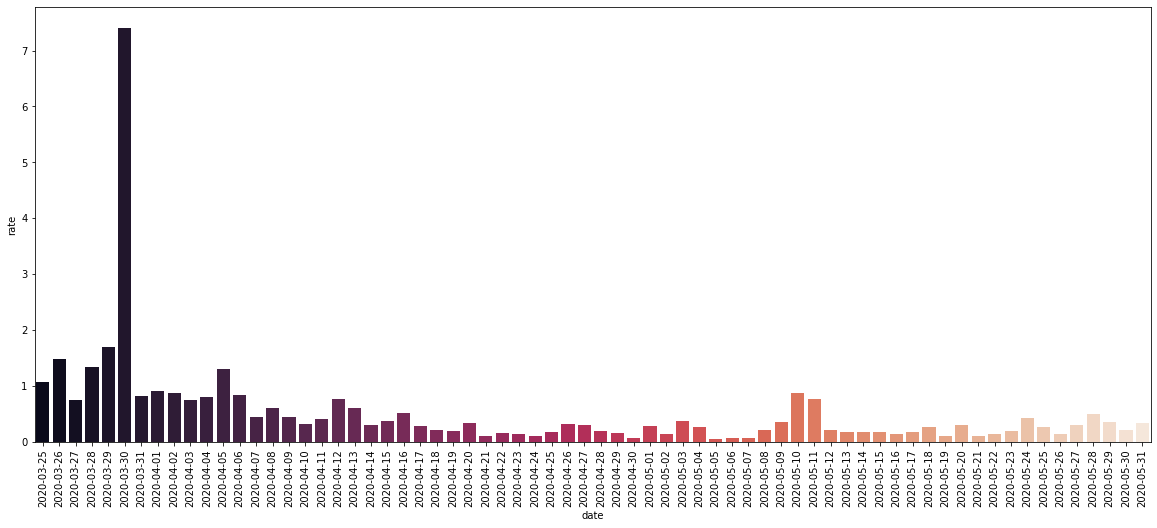

In [9]:
df_period = df_non_acc[df_non_acc["date"] >= '2020-03-25'].copy()
df_period["rate"] = df_period["confirmed"] / df_period["test"] * 100

plt.figure(figsize=(20,8))
barplot = sns.barplot(x=df_period['date'], y=df_period['rate'], palette='rocket')
plt.xticks(rotation=90)
plt.show()

In [10]:
df_age = pd.read_csv("TimeAge.csv")
df_daily_age = df_age.copy()

r, d = df_daily_age.shape
for i in range(9, r) :
    for j in range(9, d) :
        df_daily_age.iloc[i,j] = df_daily_age.iloc[i,j] - df_age.iloc[(i-9),j]
#     print(df_daily_age.iloc[i,:])

df_daily_age.to_csv("TimeAge_daily.csv", sep=',', encoding='utf-8')

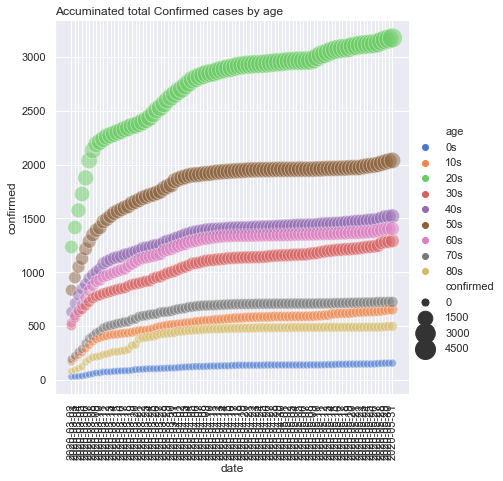

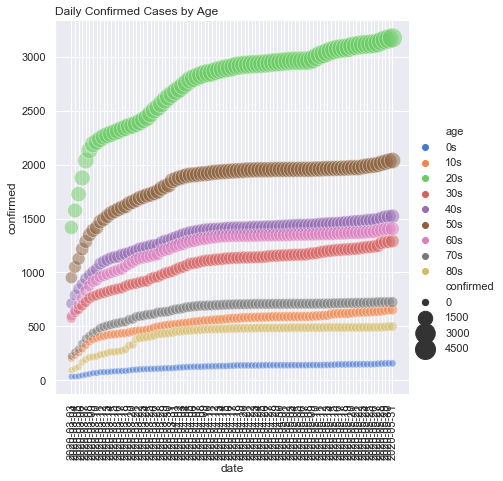

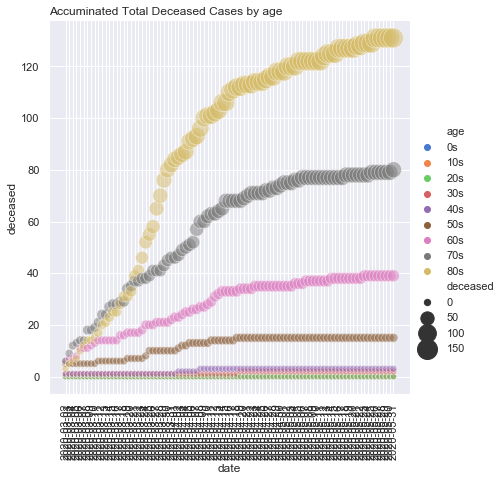

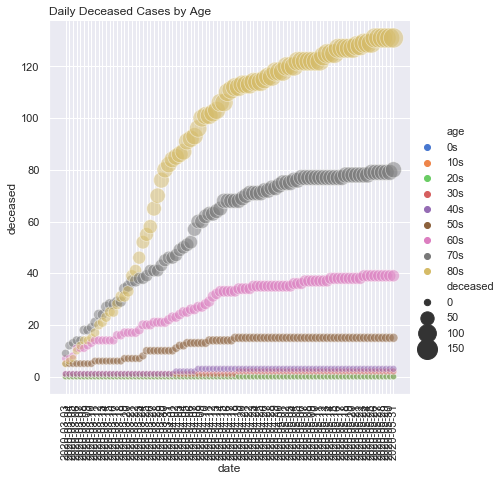

In [30]:
# plot accuminated total confirmed cases by age

sns.set(style='darkgrid')
sns.relplot(x='date', y='confirmed', hue='age', size='confirmed',
          sizes =(50,400), alpha=.5, palette='muted',
          height=6, data=df_age)
plt.title('Accuminated total Confirmed cases by age', loc='left',fontsize=12)
plt.xticks(rotation=90)

# Plot Daily Confirmed Cases by Age
sns.set(style="darkgrid")
a= sns.relplot(x="date", y="confirmed", hue="age", size="confirmed",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_daily_age[df_daily_age["date"] > '2020-03-02'])
a= plt.title('Daily Confirmed Cases by Age', loc = 'left', fontsize = 12)
a= plt.xticks(rotation=90)

# Plot Accuminated Total Deceased Cases by Age
sns.set(style='darkgrid')
a= sns.relplot(x='date',y='deceased',hue='age',size='deceased',
           sizes=(40,400), alpha=.5, palette='muted',
           height=6, data=df_age)
a= plt.title('Accuminated Total Deceased Cases by age', loc='left', fontsize=12)
a= plt.xticks(rotation=90)

# Plot Daily Deceased Cases by Age
sns.set(style="darkgrid")
a= sns.relplot(x="date", y="deceased", hue="age", size="deceased",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_daily_age[df_daily_age["date"] > '2020-03-02'])
a= plt.title('Daily Deceased Cases by Age', loc = 'left', fontsize = 12)
a= plt.xticks(rotation=90)

### gender 

In [12]:
df_gender = pd.read_csv("TimeGender.csv")
df_daily_gender = df_gender.copy()

r, d = df_daily_gender.shape
for i in range(2,r) :
    for j in range(3,d) :
        df_daily_gender.iloc[i,j] = df_daily_gender.iloc[i,j] - df_gender.iloc[(i-2), j]
        
df_daily_gender.to_csv("TimeGender_daily.csv", sep=',', encoding='utf=8')

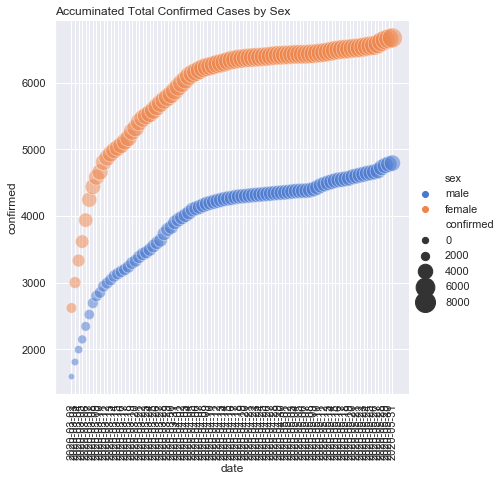

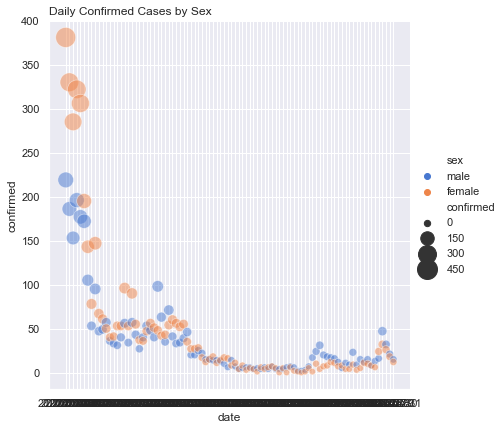

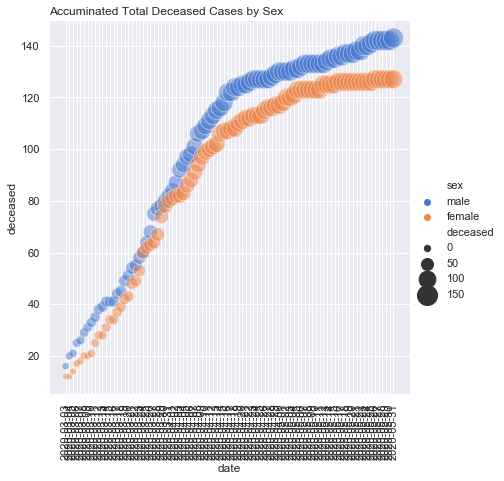

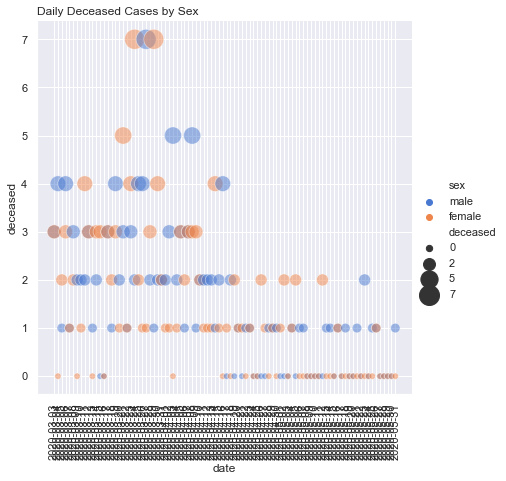

In [37]:
# Plot accuminated total confirmed cases by sex
sns.set(style='darkgrid')
a = sns.relplot(x='date', y='confirmed', hue='sex', size='confirmed', sizes=(40,400),
           alpha =.5, palette='muted', height=6, data=df_gender)
a= plt.title('Accuminated Total Confirmed Cases by Sex', loc='left', fontsize=12)
a= plt.xticks(rotation=90)

# Plot daily confirmed cases by sex
sns.set(style='darkgrid')
a= sns.relplot(x='date', y='confirmed', hue='sex', size='confirmed', sizes=(40,400),
               alpha=.5, palette='muted', height=6, data=df_daily_gender[df_daily_gender["date"] > '2020-03-02'])
a= plt.title('Daily Confirmed Cases by Sex', loc= 'left', fontsize=12)

# Plot accuminated total deceased cases by sex
sns.set(style='darkgrid')
a= sns.relplot(x='date', y='deceased', hue='sex', size='deceased', sizes=(40,400),
              alpha=.5, palette='muted', height=6, data = df_gender[df_gender['date'] > '2020-03-02'])
a= plt.title('Accuminated Total Deceased Cases by Sex', loc ='left', fontsize=12)
a= plt.xticks(rotation=90)

# Plot Daily deceased cases by sex
sns.set(style='darkgrid')
a= sns.relplot(x="date", y="deceased", hue='sex',size='deceased', sizes=(40,400),
               alpha=.5, palette='muted', height=6, data=df_daily_gender[df_daily_gender['date'] > '2020-03-02'])
a= plt.title('Daily Deceased Cases by Sex', loc='left', fontsize=12)
a= plt.xticks(rotation=90)

# WordCloud

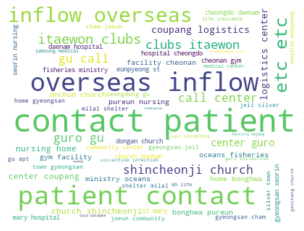

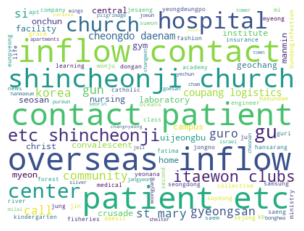

In [46]:
def wordcloud_column(dataframe):
    from wordcloud import WordCloud, STOPWORDS 
 
    comment_words = ' '
    stopwords = set(STOPWORDS) 
  
    # iterate through the csv file 
    for k in range(len(dataframe)):
        # typecaste each val to string 
        val = str(dataframe.iloc[k,0]) 
        # split the value 
        tokens = val.split()
    
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
          
        for words in tokens: 
            comment_words = comment_words + words + ' '
  
    # lower max_font_size
    wordcloud = WordCloud(width=400, height=300,background_color ='white',
                          max_font_size=60).generate(comment_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Find the word cloud for infection case in Patientinfo file
df_patient = pd.read_csv('PatientInfo.csv')
df_reason  = df_patient[['infection_case']]
df_reason  = df_reason[(df_reason['infection_case'].notna())]
wordcloud_column(df_reason)

# Find the word cloud for infection case in Case file
df_case = pd.read_csv('Case.csv')
df_case = df_case[['infection_case']]
df_case = df_case[(df_case['infection_case'].notna())]
wordcloud_column(df_case)

# Plotting map

In [13]:
m = folium.Map([37, 128], zoom_start=7, tiles='Stamen Terrain') 
m = folium.Map([37, 128], zoom_start=7, tiles='Stamen Toner') 

In [14]:
m = folium.Map([36, 128], zoom_start=7) 
m

In [15]:
m = folium.Map([36,128], zoom_start=7)

# 화면 풀스크린 & 좌표 띄우기
plugins.Fullscreen(position= 'topright',
                  title = 'Click to Expand',
                  title_cancel = 'Click to Exit',
                  force_separate_button = True).add_to(m)

plugins.MousePosition().add_to(m)
m

## 지역별 확진자수 카운트

In [16]:
print(patient.columns)
print(route.columns)
print(region.columns)

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')
Index(['patient_id', 'global_num', 'date', 'province', 'city', 'type',
       'latitude', 'longitude'],
      dtype='object')
Index(['code', 'province', 'city', 'latitude', 'longitude',
       'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count'],
      dtype='object')


In [17]:
regional_patient = pd.merge(patient[['patient_id','confirmed_date','sex','age','province','city']],
         region[['province','city','latitude','longitude']],
         how ='left', on=['province','city'])
display(regional_patient.head())
display(regional_patient.isnull().sum() / regional_patient.shape[0]) 

patient_id confirmed_date     sex  age province         city   latitude  \
0  1000000001     2020-01-23    male  50s    Seoul   Gangseo-gu  37.551166   
1  1000000002     2020-01-30    male  30s    Seoul  Jungnang-gu  37.606832   
2  1000000003     2020-01-30    male  50s    Seoul    Jongno-gu  37.572999   
3  1000000004     2020-01-30    male  20s    Seoul      Mapo-gu  37.566283   
4  1000000005     2020-01-31  female  20s    Seoul  Seongbuk-gu  37.589562   

    longitude  
0  126.849506  
1  127.092656  
2  126.979189  
3  126.901644  
4  127.016700

patient_id        0.000000
confirmed_date    0.000749
sex               0.082418
age               0.119630
province          0.000000
city              0.019481
latitude          0.037962
longitude         0.037962
dtype: float64

In [18]:
regional_count = regional_patient[['latitude','longitude']].dropna()
m = folium.Map([36, 128], zoom_start =7)

plugins.MousePosition().add_to(m)
plugins.MarkerCluster(regional_count).add_to(m)
m

## 성별 구분

In [19]:
male_patient = regional_patient.query('sex in ("male")')[['latitude','longitude']].dropna()
female_patient = regional_patient.query('sex in ("female")')[['latitude','longitude']].dropna()

In [20]:
m = folium.Map([36,128], zoom_start=7)
initial = folium.plugins.MarkerCluster(control=False)
m.add_child(initial)

female_g = plugins.FeatureGroupSubGroup(initial, 'Female')
m.add_child(female_g)

male_g = plugins.FeatureGroupSubGroup(initial, 'Male')
m.add_child(male_g)

plugins.MarkerCluster(female_patient).add_to(female_g)
plugins.MarkerCluster(male_patient).add_to(male_g)

folium.LayerControl(collapsed=False).add_to(m)
m

## 지역별 감염자 히트맵

In [21]:
# folium.plugins.HeatMap(data, name=None, min_opacity=0.5,
#                        max_zoom=18, max_val=1.0, radius=25, blur=15,
#                        gradient=None, overlay=True, control=True, show=True, **kwargs)

### heatmap parameter 
- min_opacity (default 1.) – The minimum opacity the heat will start at.
- max_zoom (default 18) – Zoom level where the points reach maximum intensity (as intensity scales with zoom), equals maxZoom of the map by default
- max_val (float, default 1.) – Maximum point intensity
- radius (int, default 25) – Radius of each “point” of the heatmap
- blur (int, default 15) – Amount of blur
- gradient (dict, default None) – Color gradient config. e.g. {0.4: ‘blue’, 0.65: ‘lime’, 1: ‘red’}
- overlay (bool, default True) – Adds the layer as an optional overlay (True) or the base layer (False).
- control (bool, default True) – Whether the Layer will be included in LayerControls.
- show (bool, default True) – Whether the layer will be shown on opening (only for overlays

In [22]:
heat_data = regional_patient\
.groupby(['latitude','longitude'])['patient_id'].count().reset_index()\
.values.tolist()

m = folium.Map([36,128], zoom_start=7)
folium.plugins.HeatMap(heat_data).add_to(m)
m

In [23]:
# heatmap 위에 통계량 나타내기

heat_data = region[['latitude','longitude','nursing_home_count']].values.tolist()
mark_data = regional_patient[['latitude','longitude']].dropna()

m = folium.Map([36,128], zoom_start=7)

plugins.MarkerCluster(mark_data).add_to(m)
folium.plugins.HeatMap(heat_data, max_opacity=0.3).add_to(m)
m

## haatmap + time series 

In [24]:
folium.plugins.HeatMapWithTime(data, index=None, name=None, 
                               radius=15, min_opacity=0, max_opacity=0.6, 
                               scale_radius=False, gradient=None, 
                               use_local_extrema=False, auto_play=False, 
                               display_index=True, index_steps=1, min_speed=0.1, 
                               max_speed=10, speed_step=0.1, position='bottomleft', 
                               overlay=True, control=True, show=True)

NameError: name 'data' is not defined

In [ ]:
regional_patient_bytime = regional_patient\
.groupby(['confirmed_date','latitude','longitude'])['patient_id'].count().reset_index()\
.sort_values(by = 'confirmed_date')

date_rng = pd.date_range(regional_patient_bytime['confirmed_date'].min(), regional_patient_bytime['confirmed_date'].max())
date_rng = [str(i)[:10] for i in date_rng]

In [ ]:
all_date_region = pd.DataFrame({'confirmed_date' : np.repeat(date_rng, region[['latitude','longitude']].drop_duplicates().shape[0]),
             'latitude' : np.tile(list(region['latitude'].drop_duplicates()), len(date_rng)),
                                 'longitude' : np.tile(list(region['longitude'].drop_duplicates()), len(date_rng))})
all_date_region

In [ ]:
all_date_region = pd.merge(all_date_region, regional_patient_bytime,
                           on=['confirmed_date','latitude','longitude'],how = 'left').fillna(0)
all_date_region['cumsum'] = all_date_region.groupby(['latitude','longitude'])['patient_id'].cumsum()

all_date_region = all_date_region[all_date_region['cumsum'] != 0]

In [ ]:
time_index, data = [], []
    
for date in all_date_region['confirmed_date'].unique():
    time_index += [date[6:].replace('-','/')]
    temp_list = all_date_region.query('confirmed_date == @date')[['latitude','longitude','cumsum']].values.tolist()
    data += [temp_list]
    del temp_list

In [ ]:
data[:5], time_index[:5]

In [ ]:
# make a map
    
m = folium.Map([36, 128], zoom_start=7)#, tiles = 'Mapbox Bright')
hm = folium.plugins.HeatMapWithTime(data, index=time_index, auto_play=False,
                                    min_opacity=0.1, radius = 25, )
hm.add_to(m)

# for top, click in zip([60,90,120,150,180],['Loop','Forward','Play','Reverse','Backward']):
#     name = '''
#             <div style="position: fixed; top: '''+str(top)+'''px; left: 30px; width: 100px; height: 20px; 
#                         background-color: white; border:1px solid grey; z-index:9999; font-size:11px;text-align:center;"
#                         >&nbsp; <br><b>Click : '''+ click +'''</b></div>'''  

#     m.get_root().html.add_child(folium.Element(name))
m

## circles + time series

In [ ]:
TimestampedGeoJson(data, transition_time=200, loop=True, auto_play=True, 
                   add_last_point=True, period='P1D', min_speed=0.1, max_speed=10, 
                   loop_button=False, date_options='YYYY-MM-DD HH:mm:ss', 
                   time_slider_drag_update=False, duration=None)

- period (str, default "P1D") –  ‘P1M’ 1/month, ‘P1D’ 1/day, ‘PT1H’ 1/hour, and ‘PT1M’ 1/minute

In [ ]:
df_dropna = regional_patient.dropna()
df_dropna['timestamp'] = [i + 'T00:00:00' for i in df_dropna['confirmed_date']]

In [ ]:
df_dropna['confirmed_date']

In [ ]:
points = []
for date in sorted(df_dropna['confirmed_date'].unique()):
    temp = df_dropna.query('confirmed_date == @date')
    
    temp_dict = {}
    temp_dict['coordinates'] = temp[['longitude','latitude']].values.tolist()
    temp_dict['dates'] = temp['timestamp'].values.tolist()
    
    points += [temp_dict]
    
features = [ {'type' : 'Feature',
                 'geometry' : { 'type': 'MultiPoint',
                              'coordinates' : point['coordinates'], },
                 'properties' : { 'times': point['dates'],
                                'icon' : 'circle'}
             } for point in points ]

In [ ]:
features[:3]

In [ ]:
m = folium.Map( location=[36,128], zoom_start=7 )
plugins.TimestampedGeoJson({
    'type' : 'FeatureCollection',
    'features' : features,
}, period= 'P1D', auto_play = False).add_to(m)

m